In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_data = pd.read_csv('/Users/spencerfogelman/Downloads/epicurious-recipes-with-rating-and-nutrition/epi_r.csv')

In [6]:
len(raw_data.columns)

680

In [15]:
nulls = raw_data.isnull().mean() 
nulls = nulls[nulls > 0]
nulls.index

Index(['calories', 'protein', 'fat', 'sodium'], dtype='object')

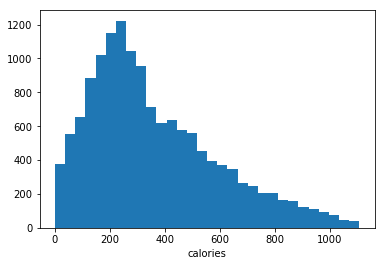

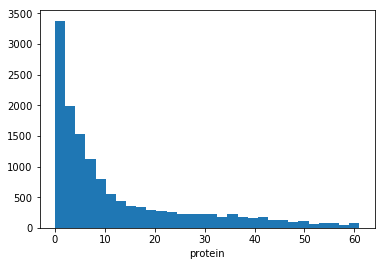

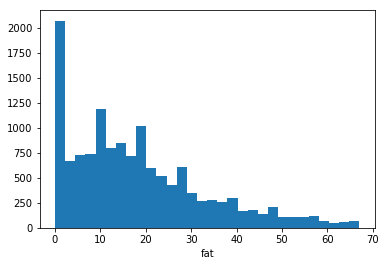

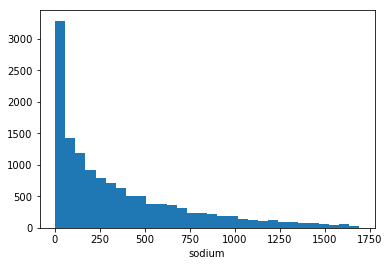

In [24]:
for var in nulls.index:
    mean = raw_data[var].mean()
    dev = raw_data[var].std()
    outliers = raw_data[raw_data[var] > (mean + 3*dev)]
    raw_data.drop(outliers.index, inplace=True)
    plt.hist(raw_data[var].dropna(), bins=30)
    plt.xlabel(var)
    plt.show()

In [25]:
raw_data.dropna(inplace=True)

In [26]:
raw_data.shape

(13479, 680)

In [27]:
from sklearn.svm import SVC

In [28]:
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
raw_data.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=680)

In [37]:
X = raw_data.drop(['title', 'rating'], axis=1)

In [54]:
from sklearn.feature_selection import SelectKBest

In [55]:
from sklearn.feature_selection import f_classif

In [38]:
y = raw_data['rating']

In [47]:
y[y<4] = 0

y[y>=4] = 1

/Users/spencerfogelman/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
X_new = SelectKBest(f_classif, 30).fit_transform(X, y)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [64]:
model = SVC()

In [65]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
model.score(X_train, y_train)

0.96703762586115527